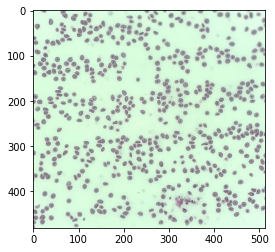

In [3]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt


img = cv.imread(r"C:\Users\rieke\Desktop\bloodsmears\Image_0054.jpeg");

plt.imshow(img)

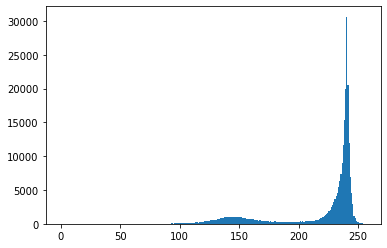

[[[ 66  29 251]
  [ 65  30 253]
  [ 65  29 255]
  ...
  [ 69  20 255]
  [ 67  18 255]
  [ 67  18 255]]

 [[ 66  29 251]
  [ 66  29 254]
  [ 65  28 254]
  ...
  [ 69  20 255]
  [ 68  18 255]
  [ 67  17 254]]

 [[ 66  29 251]
  [ 65  28 254]
  [ 65  28 254]
  ...
  [ 69  20 255]
  [ 68  18 254]
  [ 67  17 254]]

 ...

 [[142  20 142]
  [144   9 141]
  [  0   0 138]
  ...
  [ 69  26 255]
  [ 69  26 255]
  [ 69  26 255]]

 [[143  22 149]
  [140  11 145]
  [  0   0 141]
  ...
  [ 69  26 255]
  [ 69  26 255]
  [ 69  26 255]]

 [[144  26 155]
  [140  10 146]
  [ 90   4 143]
  ...
  [ 69  26 255]
  [ 69  26 255]
  [ 69  26 255]]]
466


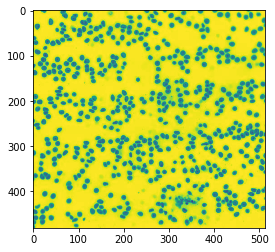

In [8]:

gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
from matplotlib import pyplot as plt
plt.hist(gray.ravel(),256,[0,256]);
plt.show()
plt.imshow(gray, cmap="gray")
(minVal, maxVal, minLoc, maxLoc) = cv.minMaxLoc(gray)
thresh2 = cv.cvtColor(gray, cv.COLOR_GRAY2RGB)
thresh3 = cv.cvtColor(img, cv.COLOR_RGB2HSV)
print(thresh3)
th = thresh3[:,:,2]

plt.imshow(th)



ret, thresh1 = cv.threshold(gray, 200, 255, cv.THRESH_BINARY+ cv.THRESH_OTSU)






contours, hierarchy = cv.findContours(thresh1,
                                       cv.RETR_LIST,
                                       cv.CHAIN_APPROX_NONE)
count = 0
for con in contours:
    if(cv.contourArea(con)>20):
        img_contour = cv.drawContours(gray, con, -1, (255, 0, 255), 10)
        count= count+1
print(count)
#plt.imshow(img_contour, cmap= "gray")

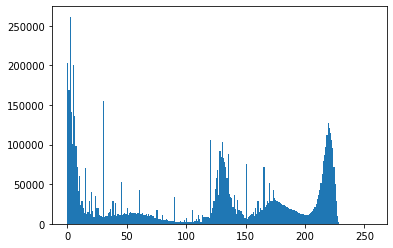

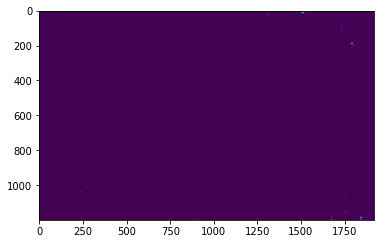

In [141]:
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
from matplotlib import pyplot as plt

plt.hist(hsv.ravel(), 256, [0, 256]);
plt.show()
plt.imshow(hsv, cmap="gray")
hue =hsv[:, :, 0]
sat = hsv[:, :, 1]
val =hsv[:, :, 2]
plt.imshow(test)



228.0


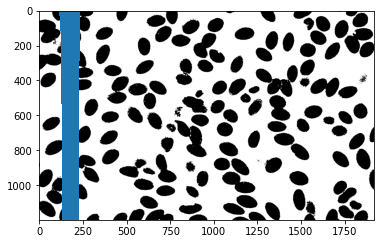

In [142]:
plt.hist(val.ravel(), 256, [0, 256]);

print(maxVal)
(minVal, maxVal, minLoc, maxLoc) = cv.minMaxLoc(hue)

ret, thresh1 = cv.threshold(val, 100, 150, cv.THRESH_BINARY +
                            cv.THRESH_OTSU)
plt.imshow(thresh1, cmap="gray")

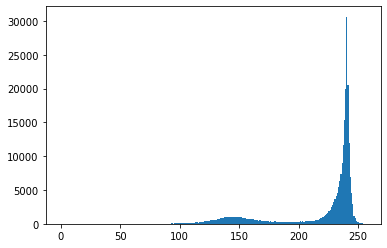

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\contours.cpp:197: error: (-210:Unsupported format or combination of formats) [Start]FindContours supports only CV_8UC1 images when mode != CV_RETR_FLOODFILL otherwise supports CV_32SC1 images only in function 'cvStartFindContours_Impl'


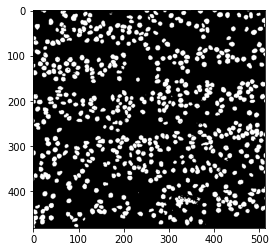

In [7]:

import cv2
import numpy as np
from matplotlib import pyplot as plt
import math


img = cv2.imread(r"C:\Users\rieke\Desktop\bloodsmears\Image_0054.jpeg")
#plt.hist(img.ravel(),256,[0,256]); plt.show()

original = img.copy()
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.hist(gray.ravel(),256,[0,256]); plt.show()

plt.imshow(gray,cmap="gray")
#plt.imshow(hsv, cmap="hsv")

ret,tresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(tresh, cmap ="gray")
# noise removal

tresh = ret > 120

contours, hierarchy = cv2.findContours(tresh,
                                       cv2.RETR_LIST,
                                       cv2.CHAIN_APPROX_NONE)
img_contour = cv2.drawContours(gray, contours, -1, (0, 255, 0), 3)
print(len(contours))
plt.imshow(img_contour, cmap= "brg")
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]



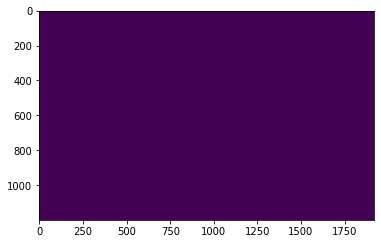

In [144]:

hsv_lower = np.array([156,60,0])
hsv_upper = np.array([179,115,255])
mask = cv2.inRange(hsv, hsv_lower, hsv_upper)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=1)
close = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel, iterations=2)
plt.imshow(close)

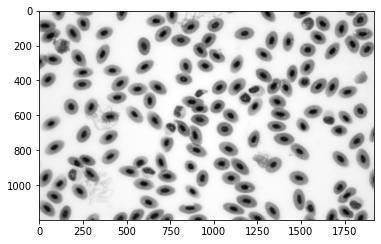

In [145]:
import skimage.io
import skimage.color
import skimage.filters
image = skimage.io.imread("/Users/rieke/Desktop/blood smears/Image_2515.tif")
# convert the image to grayscale
gray_image = skimage.color.rgb2gray(image)
hsv_image = skimage.color.rgb2hsv(image)

# blur the image to denoise
blurred_image = skimage.filters.gaussian(gray_image, sigma=1.0)

fig, ax = plt.subplots()
plt.imshow(blurred_image, cmap="gray")
plt.show()




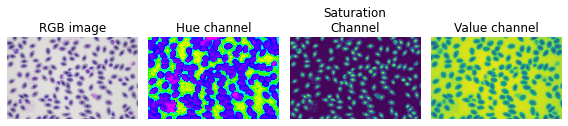

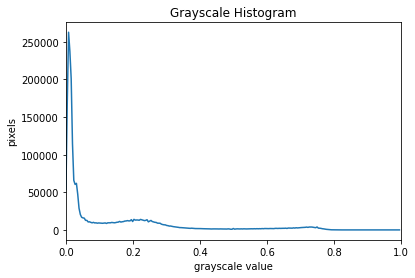

0.8877010014273448


In [146]:
# create a histogram of the blurred grayscale image
hue_img = hsv_image[:, :, 0]
sat_img = hsv_image[:,:,1]
value_img = hsv_image[:, :, 2]

fig, (ax0, ax1, ax2, ax3) = plt.subplots(ncols=4, figsize=(8, 2))
ax0.imshow(image)
ax0.set_title("RGB image")
ax0.axis('off')
ax1.imshow(hue_img, cmap='hsv')
ax1.set_title("Hue channel")
ax1.axis('off')
ax2.imshow(sat_img)
ax2.set_title('Saturation\nChannel')
ax2.axis('off')
ax3.imshow(value_img)
ax3.set_title("Value channel")
ax3.axis('off')
fig.tight_layout()
histogram, bin_edges = np.histogram(sat_img, bins=256, range=(0.0, 1.0))

fig, ax = plt.subplots()
plt.plot(bin_edges[0:-1], histogram)
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
plt.xlim(0, 1.0)
plt.show()

max_val = np.max(blurred_image)
print(max_val)

0.761312806372549


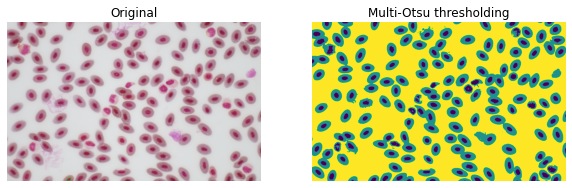

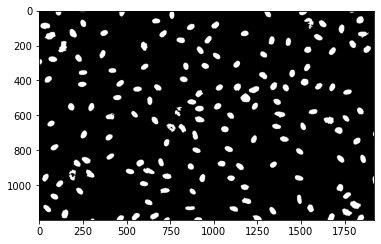

157
157


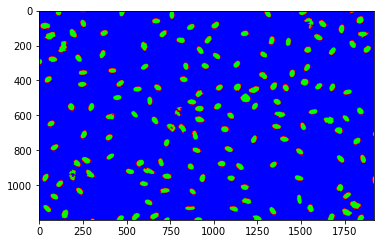

In [187]:
t = skimage.filters.threshold_otsu(value_img)
print(t)

thresholds = skimage.filters.threshold_multiotsu(gray_image, classes=3)
regions = np.digitize(gray_image, bins=thresholds)


fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].imshow(image)
ax[0].set_title('Original')
ax[0].axis('off')
ax[1].imshow(regions)
ax[1].set_title('Multi-Otsu thresholding')
ax[1].axis('off')
plt.show()

binary_mask = gray_image < thresholds[0]
binary_mask = skimage.morphology.remove_small_objects(binary_mask, 50)
binary_mask = skimage.morphology.remove_small_holes(binary_mask, 50)
fig, ax = plt.subplots()
plt.imshow(binary_mask, cmap="gray")
plt.show()
from skimage import img_as_ubyte
save =  img_as_ubyte(image)
cv_image = img_as_ubyte(binary_mask)
import imutils

contours, hierarchies = cv.findContours(cv_image, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
print(len(contours))



count = 0
for contour in contours:
    if(cv.contourArea(contour) < 10):
        continue
    else:
        cv.drawContours(cv_image, contour, 2, (0,255,0), 2)
        count = count + 1

print(count)
plt.imshow(cv_image, cmap="brg")


In [ ]:
circles = cv.HoughCircles(cv_image,cv.HOUGH_GRADIENT, 1, 20, param1 = 50,
               param2 = 30, minRadius = 10, maxRadius = 100)


# ensure at least some circles were found
if circles is not None:
	# convert the (x, y) coordinates and radius of the circles to integers
	circles = np.round(circles[0, :]).astype("int")
	# loop over the (x, y) coordinates and radius of the circles
	for (x, y, r) in circles:
		# draw the circle in the output image, then draw a rectangle
		# corresponding to the center of the circle
		cv.circle(output, (x, y), r, (0, 255, 0), 4)
		cv.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
	# show the output image
cv.imshow("1", np.hstack([cv_image, output]))
cv.waitKey(0)



In [148]:

gre = skimage.transform.hough_ellipse(binary_mask, min_size=100, max_size=120)

fig, bx = plt.subplots()
bx.imshow(image, cmap=plt.cm.gray)
for center_y, center_x, radius in gre:
    circy, circx = skimage.draw.circle_perimeter(center_y, center_x, radius,
                                    shape=gre.shape)
    gre[circy, circx] = (220, 20, 20)
plt.show()


KeyboardInterrupt: 

In [ ]:


contours = skimage.measure.find_contours(binary_mask, 0.8)
fig, ax = plt.subplots()
ax.imshow(binary_mask, cmap=plt.cm.gray)
for con in contours:
    x,y= skimage.measure.EllipseModel(con)
    eli = skimage.measure.EllipseModel()
    eli = eli.estimate(x,y)
count = 0
for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=1)
    count = count+1

print(count)
ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()
plt.imshow(sat_img)

count = 0
for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=1)
    count = count + 1

In [163]:
import numpy as np
import cv2

img = cv2.imread("/Users/rieke/Desktop/blood smears/Image_2515.tif")

image = cv2.GaussianBlur(img,(5,5),0)
cv2.imshow('Filtered_original',image)

Lab = cv2.cvtColor(image, cv2.COLOR_LBGR2LAB)

#masking/thresholding
lower = np.array([130,146,20])
upper = np.array([255,255,180])

mask = cv2.inRange(Lab, lower, upper)
#cv2.imshow('Masked',mask)

masked = np.ones(image.shape[:2], dtype="uint8") * 255

#morphology
kernal = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(mask,cv2.MORPH_OPEN,kernal, iterations = 2)
final = cv2.dilate(opening,kernal,iterations = 3)
cv2.imshow('Final',final)

im2,contours,hierarchy = cv2.findContours(final, 1, 2)

for (i, c) in enumerate(contours):
    cnt = contours[i]
    M = cv2.moments(cnt)
    #print( M )
    x,y,w,h = cv2.boundingRect(cnt)
    if h>170 or w>170:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
        crop = image[y:y+h, x:x+w]
        #cv2.imwrite('/home/sourav/Documents/Segmentation/Cropped/sample{}.jpg'.format(i+1), crop)
        cv2.imshow('Crop{}'.format(i+1),crop)

plt.imshow(img)

ValueError: not enough values to unpack (expected 3, got 2)

In [165]:
t2 = cv.imread("/Users/rieke/Desktop/blood smears/Image_2515.tif")
output = t2.copy()

thresh = cv.cvtColor(t2, cv.COLOR_BGR2GRAY)
# detect circles in the image
circles = cv.HoughCircles(thresh,cv.HOUGH_GRADIENT, 1, 20, param1 = 50,
               param2 = 30, minRadius = 1, maxRadius = 40)


# ensure at least some circles were found
if circles is not None:
	# convert the (x, y) coordinates and radius of the circles to integers
	circles = np.round(circles[0, :]).astype("int")
	# loop over the (x, y) coordinates and radius of the circles
	for (x, y, r) in circles:
		# draw the circle in the output image, then draw a rectangle
		# corresponding to the center of the circle
		cv.circle(output, (x, y), r, (0, 255, 0), 4)
		cv.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
	# show the output image
	cv.imshow("outputs", np.hstack([t2, output]))
	cv.waitKey(0)



KeyboardInterrupt: 

466


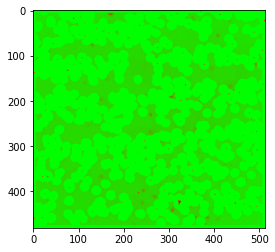

In [27]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt


img = cv.imread(r"C:\Users\rieke\Desktop\bloodsmears\Image_0054.jpeg");

plt.imshow(img)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
rety, threshy = cv.threshold(gray, 180, 255, cv.THRESH_BINARY+ cv.THRESH_OTSU)

contoury, hierarchyy = cv.findContours(threshy,
                                       cv.RETR_LIST,
                                       cv.CHAIN_APPROX_NONE)
county = 0
for cony in contoury:
    if(cv.contourArea(cony)>20):
        img_contoury = cv.drawContours(gray, cony, -1, (255, 0, 255), 10)
        county= count+1
print(count)

plt.imshow(img_contoury, cmap="brg")
